In [59]:
# 1. First I will import libraries that are needed:

import numpy as np # For Numerical calculations
import pandas as pd # To work with DataFrames

# Visualization Tools:
import matplotlib.pyplot as plt 
%matplotlib inline

import seaborn as sns

import sklearn


In [2]:
# 2. Loading the Data:

df = pd.read_csv('Indian Liver Patient Dataset (ILPD).csv')


In [3]:
df.shape

(499, 11)

In [4]:
df.columns

Index(['age', 'gender', 'tot_bilirubin', 'direct_bilirubin', 'tot_proteins',
       'albumin', 'ag_ratio', 'sgpt', 'sgot', 'alkphos', 'is_patient'],
      dtype='object')

In [5]:
df.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [6]:
# 2. Data Analysis: There are 2 types of Data:
#  a. Categorical Data
#  b. Numerical Data

# I will First identify and filter "Categorical Data" like 'gender' here:
df.dtypes[df.dtypes=='object']


gender    object
dtype: object

In [7]:
# 3. Distribution of 
# a. Categorical Data:
# b. Numerical Data:

In [8]:
# a. Distribution of Categorical Data and its Bar Plots:
df.describe(include=['object'])

,gender
count,499
unique,2
top,Male
freq,371


Number of patients that are male:  371
Number of patients that are female:  128


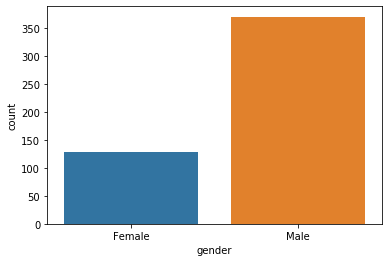

In [12]:
# The above chart shows more Males(371) than Females(128).
# Let me print this out:

sns.countplot(data=df, x = 'gender', label='Count')

M, F = df['gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

In [13]:
# Now I will Label 'Males' as 0, and 'Females' as 1:

def partition(x):
    if x =='Male':
        return 0
    return 1

df['gender'] = df['gender'].map(partition)

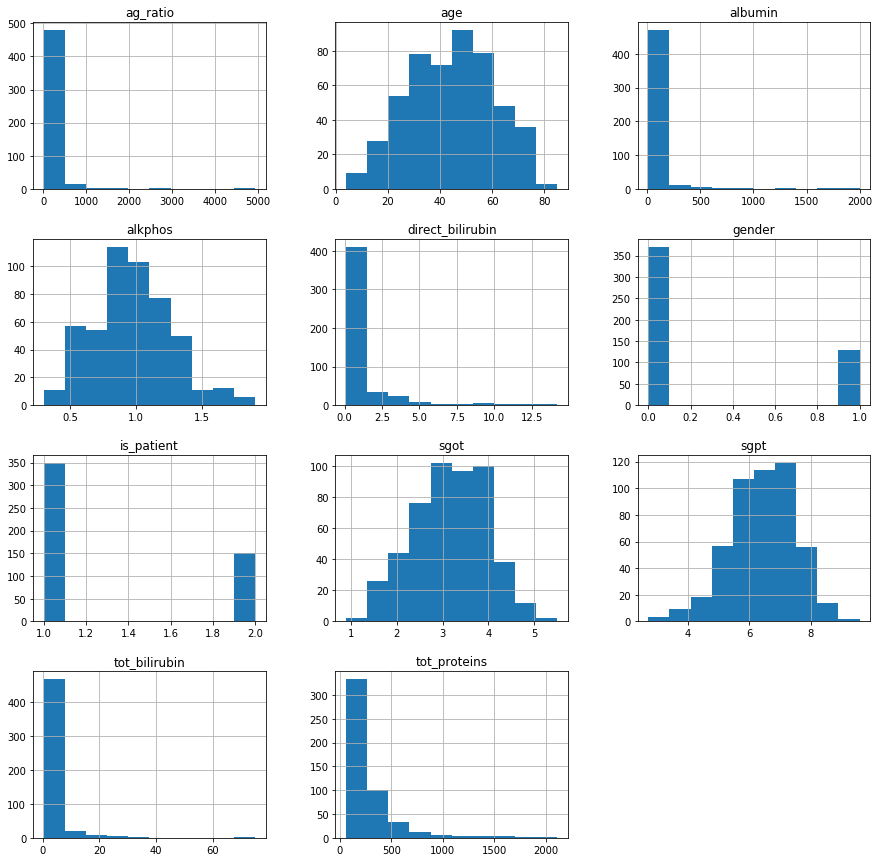

In [14]:
# b. Distribution of Numerical Data and its Bar Plots:

df.hist(figsize=(15,15), bins=10)
plt.show()

In [15]:
df.describe()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,495.000000,499.000000
mean,44.565130,0.256513,2.601804,1.116232,296.266533,82.821643,108.897796,6.443287,3.169339,0.961636,1.300601
std,16.543398,0.437146,5.125182,2.068670,257.709230,194.552381,307.396797,1.089587,0.800453,0.294138,0.458980
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,32.500000,0.000000,0.800000,0.200000,175.000000,23.000000,24.500000,5.700000,2.600000,0.800000,1.000000
50%,45.000000,0.000000,0.900000,0.300000,205.000000,33.000000,40.000000,6.500000,3.100000,1.000000,1.000000
75%,58.000000,1.000000,2.150000,1.000000,298.000000,59.500000,79.500000,7.200000,3.800000,1.100000,2.000000
max,85.000000,1.000000,75.000000,14.200000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,1.900000,2.000000


In [16]:
# From Above chart, in 'is_patient' 1 is for liver disease and 2 for No-liver disease:
# I will convert the value 2 to 0 for No-liver disease:

def partition(x):
    if x == 2:
        return 0
    return 1

df['is_patient'] = df['is_patient'].map(partition)

In [19]:
# 3. Data Cleaning: I will clean my data by the following steps:
# a. Droping Duplicate Values:
# b. Droping / Correcting Null Values:
# c. Removing the Outliers:


In [21]:
# a. Droping Duplicate Values:
df = df.drop_duplicates()
df.shape

(486, 11)

In [22]:
# b. Droping / Correcting Null Values:
df.isnull().any()

age                 False
gender              False
tot_bilirubin       False
direct_bilirubin    False
tot_proteins        False
albumin             False
ag_ratio            False
sgpt                False
sgot                False
alkphos              True
is_patient          False
dtype: bool

In [23]:
# There are 4(True) Null values, and I will drop them: 
df=df.dropna()

In [25]:
df.shape

(482, 11)

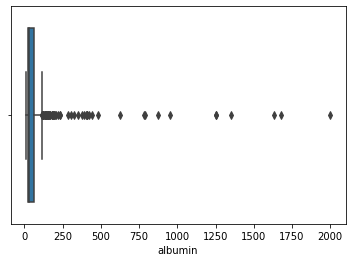

In [28]:
# c. Removing the Outliers:
# There are Outliers..for example in Albumin and ag_ratio the Max value is much greater than mean value:
sns.boxplot(df.albumin)

In [29]:
df.albumin.sort_values(ascending=False).head()

117    2000
27     1680
47     1630
118    1350
119    1250
Name: albumin, dtype: int64

In [30]:
df = df[df.albumin <=1000 ]
df.shape

(476, 11)

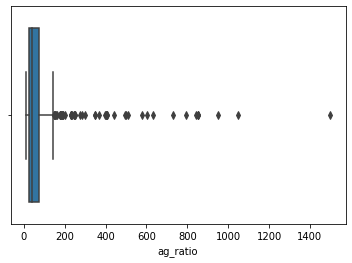

In [32]:
# similarly for ag_ratio:
sns.boxplot(df.ag_ratio)

In [33]:
df.ag_ratio.sort_values(ascending=False).head()

207    1500
199    1050
97      950
90      850
92      850
Name: ag_ratio, dtype: int64

In [34]:
df = df[df.ag_ratio <=1000 ]
df.shape

(474, 11)

In [36]:
# Finally:
df.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
# 4. Machine Lerning Models: I will apply several models  like:
# a. Logistic Regressions
# b. Random Forest
# c. Descision Trees


# Before moving to the ML models, I have to organise the data by following ways:
# 1. Data preparations:
# 2. Data Standardization:

# 1. Data preparations:
y = df.is_patient # y = separate object for target variable
X = df.drop('is_patient', axis=1) # X = separate object for input features

In [43]:
# I have split  X and y into train and test sets:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234, stratify=df.is_patient)

In [45]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# This give the number of observations for 'train' and 'test' samples

(379, 10) (95, 10) (379,) (95,)


In [46]:
# 2. Data Standardization:
# I am going to set Mean = 0 (zero mean centring) and Standard Deviation = 1 (unit scaling)
# I apply this Mean and Standard Deviation to each of the feature and save it from the Training set, which later I will apply for test set also

#from math import sqrt
train_mean = X_train.mean()
train_std = X_train.std()

In [47]:
# Standardization formula:
X_train = (X_train - train_mean) / train_std

In [48]:
X_train.describe() # This gives Mean and Standard Deviation

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos
count,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02
mean,-1.036989e-16,3.515218e-17,3.138797e-16,4.704533e-16,1.091182e-16,3.515218e-17,5.302121e-17,-3.661685e-15,-2.147798e-15,1.613485e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.441889e+00,-6.100850e-01,-3.795246e-01,-4.793793e-01,-9.201730e-01,-5.880620e-01,-5.514765e-01,-3.407375e+00,-2.852476e+00,-2.264007e+00
25%,-7.156990e-01,-6.100850e-01,-3.231684e-01,-4.300085e-01,-4.787527e-01,-4.319783e-01,-4.326197e-01,-6.031407e-01,-6.751200e-01,-5.722511e-01
50%,-1.413494e-03,-6.100850e-01,-3.043830e-01,-3.806376e-01,-3.630025e-01,-3.119139e-01,-3.137630e-01,3.007350e-02,9.192006e-03,1.044514e-01
75%,8.319196e-01,1.634791e+00,-9.774357e-02,-3.504159e-02,1.904927e-03,-3.576588e-02,-5.906996e-02,6.632877e-01,8.179244e-01,4.428027e-01
max,2.379538e+00,1.634791e+00,1.361560e+01,6.481912e+00,7.111715e+00,8.644888e+00,6.579928e+00,2.834308e+00,2.870860e+00,3.149613e+00


In [49]:
# I will use train_mean and train_std_dev to standardize test data set:
X_test = (X_test - train_mean) / train_std

In [50]:
X_test.describe()
# Here mean and std.Dev should not be 0 and 1 respectively.

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,-0.042140,-0.137480,-0.051472,-0.044396,-0.046254,0.098201,0.182844,-0.021345,-0.089035,-0.108176
std,0.954447,0.920052,0.629490,0.890433,1.022099,1.299905,1.361033,0.962196,0.995180,0.947970
min,-2.322841,-0.610085,-0.398310,-0.479379,-0.814232,-0.588062,-0.526007,-2.593242,-2.852476,-2.264007
25%,-0.775223,-0.610085,-0.341954,-0.430008,-0.519952,-0.443985,-0.441109,-0.693600,-0.737330,-0.826015
50%,-0.001413,-0.610085,-0.304383,-0.380638,-0.378697,-0.263888,-0.262824,0.030073,-0.115228,-0.166230
75%,0.772396,-0.610085,-0.069565,-0.084412,-0.033409,0.030270,0.106480,0.708517,0.631294,0.442803
max,1.724776,1.634791,3.884762,5.691978,6.272035,9.797506,7.428905,2.020175,2.870860,2.811262


In [61]:
# Now I will start ML models one by one:
# a. Logistic Regressions: 
# In any ML method, 2 tasks are done with Data pipelines:
# 1. cross validation(CV):is the process of training learners using one set of data and testing it using a different set.
# 2. (hyper)parameter tuning: is the process to selecting the values for a model’s parameters that maximize the accuracy of the model.

# Now I will import some modules:
from sklearn.model_selection import GridSearchCV # For (hyper)parameter tuning:

from sklearn.model_selection import cross_val_score # For cross validation(CV):

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix


tuned_params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 'penalty': ['l1', 'l2']}
model = GridSearchCV(LogisticRegression(), tuned_params, scoring = 'roc_auc', n_jobs=-1)
model.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [62]:
model.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
y_train_pred = model.predict(X_train) # Predict Train set results

In [64]:
y_pred = model.predict(X_test) # Predict Test set results

In [65]:
y_pred_proba = model.predict_proba(X_test)[:,1] # To Get the prediction for the positive class (1)

In [66]:
y_pred_proba[:15] # First 15 predictions

array([0.71545621, 0.80817074, 0.76205983, 0.85948236, 0.66982927,
       0.71937537, 0.601804  , 0.93628687, 0.69332045, 0.74138766,
       0.97699881, 0.82066771, 0.76823361, 0.43661143, 0.98634161])

In [67]:
i=32  # You can take I  any point (45, 330, etc.). Here I took i = 32
print('For test point {}, actual class = {}, precited class = {}, predicted probability = {}'.
      format(i, y_test.iloc[i], y_pred[i], y_pred_proba[i]))

For test point 32, actual class = 1, precited class = 1, predicted probability = 0.9134179672862485


In [70]:
confusion_matrix(y_test, y_pred).T

array([[ 3,  8],
       [26, 58]], dtype=int64)

In [71]:
# Now I will calculate Roc curve using y_test, y_pred_proba:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

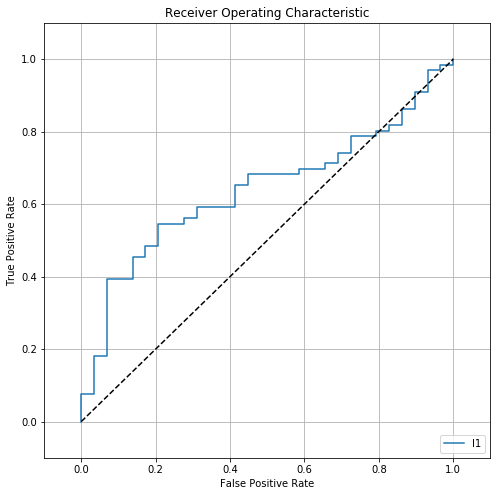

In [75]:
# Now I will Plot ROC Curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid(True) # To grid to the map or can also use styles like 'ggplot', ...etc
plt.show()


In [76]:
# Now I will Calculate AUC for Train set
print(roc_auc_score(y_train, y_train_pred))

0.5995312704864298


In [77]:
# Now I will calculate AUC for Test set
print(auc(fpr, tpr))

0.6400208986415883


In [78]:
# b. Random forest:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV


In [80]:
tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
model = RandomizedSearchCV(RandomForestClassifier(), tuned_params, n_iter=15, scoring = 'roc_auc', n_jobs=-1)
model.fit(X_train, y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

In [81]:
model.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [83]:
y_train_pred = model.predict(X_train) # Predict Train set results
y_pred = model.predict(X_test) # Predict Test set results

In [84]:
y_pred_proba = model.predict_proba(X_test)[:,1] # To Get the prediction for the positive class (1)

In [85]:
y_pred_proba[:15] # First 15 predictions

array([0.62982279, 0.83341792, 0.73825863, 0.83505084, 0.60995499,
       0.75142264, 0.44969207, 0.82025422, 0.68086602, 0.72256814,
       0.89135895, 0.67734984, 0.69849821, 0.47171276, 0.98752381])

In [86]:
confusion_matrix(y_test, y_pred).T

array([[ 7, 11],
       [22, 55]], dtype=int64)

In [87]:
# Now I will calculate Roc curve using y_test, y_pred_proba:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

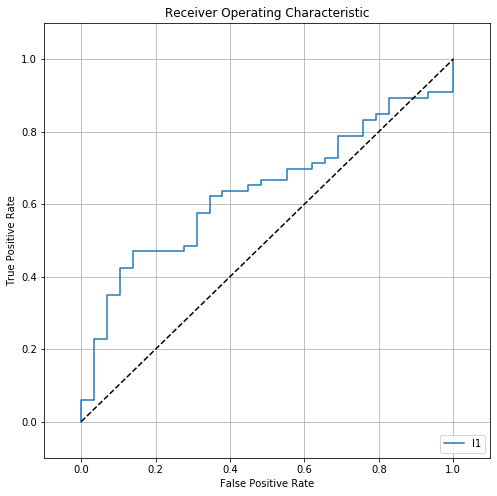

In [88]:
# Now I will Plot ROC Curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid(True) # To grid to the map or can also use styles like 'ggplot', ...etc
plt.show()


In [89]:
# Now I will Calculate AUC for Train set
print(roc_auc_score(y_train, y_train_pred))

0.8717057820899435


In [90]:
# Now I will calculate AUC for Test set
print(auc(fpr, tpr))

0.6368861024033439


In [91]:
# c. Descision Trees:
from sklearn.tree import DecisionTreeClassifier

In [92]:
tuned_params = {'min_samples_split': [2, 3, 4, 5, 7], 'min_samples_leaf': [1, 2, 3, 4, 6], 'max_depth': [2, 3, 4, 5, 6, 7]}
model = RandomizedSearchCV(DecisionTreeClassifier(), tuned_params, n_iter=15, scoring = 'roc_auc', n_jobs=-1)
model.fit(X_train, y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
       

In [93]:
model.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [95]:
y_train_pred = model.predict(X_train) # Predict Train set results
y_pred = model.predict(X_test) # Predict Test set results

In [96]:
y_pred_proba = model.predict_proba(X_test)[:,1] # To Get the prediction for the positive class (1)

In [97]:
y_pred_proba[:15] # First 15 predictions

array([0.88888889, 0.88888889, 0.59259259, 0.88888889, 0.88888889,
       0.59259259, 0.25925926, 0.625     , 0.54225352, 0.88888889,
       1.        , 0.59259259, 0.88888889, 0.25925926, 1.        ])

In [98]:
confusion_matrix(y_test, y_pred).T

array([[ 1,  5],
       [28, 61]], dtype=int64)

In [99]:
# Now I will calculate Roc curve using y_test, y_pred_proba:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

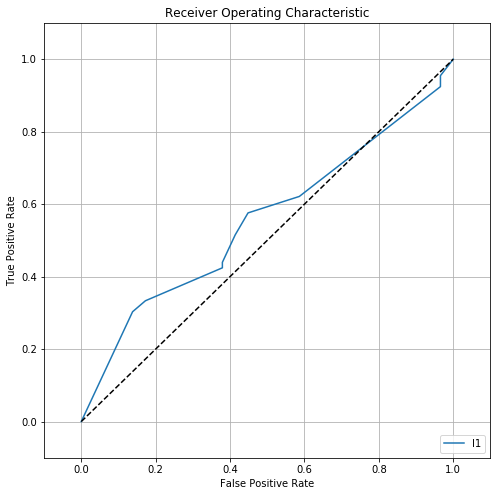

In [100]:
# Now I will Plot ROC Curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid(True) # To grid to the map or can also use styles like 'ggplot', ...etc
plt.show()


In [101]:
# Now I will Calculate AUC for Train set
print(roc_auc_score(y_train, y_train_pred))

0.5863380097023732


In [102]:
# Now I will calculate AUC for Test set
print(auc(fpr, tpr))

0.554858934169279
